In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # Añadir raíz del proyecto al path

In [2]:
# Importar componentes del framework de difusión
from generative_diffusion.utils import *
from generative_diffusion.diffusion import ModelFactory
from generative_diffusion.score_networks import ScoreNet

In [3]:
# Configurar parámetros
BATCH_SIZE = 32
N_EPOCHS = 30
LR = 1e-3
CHECKPOINT_INTERVAL = 5

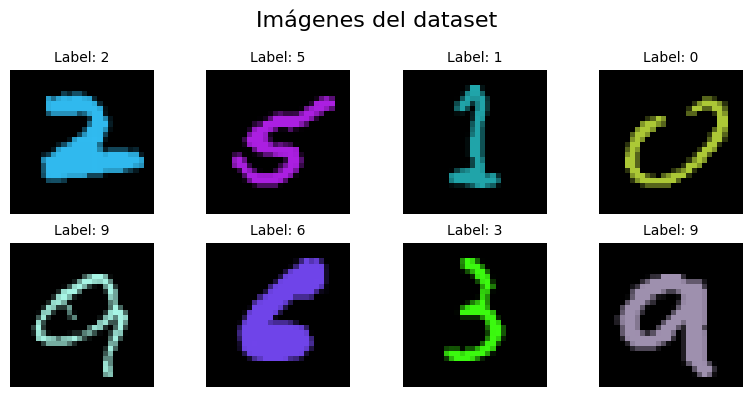

In [4]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import random

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
    transforms.Lambda(lambda x: x * torch.tensor([random.random(), random.random(), random.random()]).view(3,1,1))
])

dataset = datasets.MNIST(root='../data', 
                         train=True,
                         download=True,
                         transform=transform)

train_dataloader = DataLoader(
    dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True)

# Visualizar un batch de imágenes
show_images(train_dataloader, n_images=8, title="Imágenes del dataset")

# Modelos

---
## VE

In [5]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="probability_flow_ode",
)

2025-05-02 13:58:32,039 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [6]:
# N_EPOCHS = 30
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_ve.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "ve_sde"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [7]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="euler_maruyama",
)

2025-05-02 13:58:32,074 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [8]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_euler.load_score_model("../checkpoints/ve_sde.pt")

2025-05-02 13:58:32,091 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-02 13:58:32,284 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 13:58:32,286 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 13:58:32,323 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 13:58:32,327 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 13:58:32,351 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


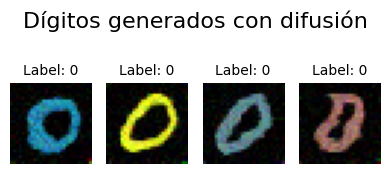

In [9]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_euler, condition = diffusion_model_ve_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_euler, title="Dígitos generados con difusión", labels=condition)

### Predictor - Corrector

In [10]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="predictor_corrector",
)

2025-05-02 13:58:40,355 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [11]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_predictor.load_score_model("../checkpoints/ve_sde.pt")

2025-05-02 13:58:40,372 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-02 13:58:40,397 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 13:58:40,398 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 13:58:40,447 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 13:58:40,452 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 13:58:40,482 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


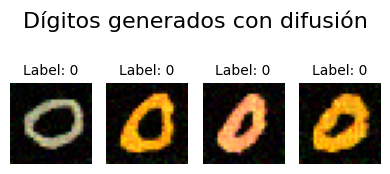

In [12]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_predictor, condition = diffusion_model_ve_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_predictor, title="Dígitos generados con difusión", labels=condition)

### Flow ODE

In [13]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="probability_flow_ode",
)

2025-05-02 13:59:51,372 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [14]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_flow_ode.load_score_model("../checkpoints/ve_sde.pt")

2025-05-02 13:59:51,386 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-02 13:59:51,408 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 13:59:51,410 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 13:59:51,466 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 13:59:51,472 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 13:59:51,505 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


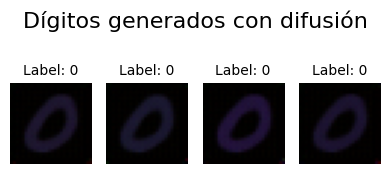

In [15]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_flow_ode, condition = diffusion_model_ve_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_flow_ode, title="Dígitos generados con difusión", labels=condition)

### Exponential Integrator

In [16]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_ve_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='ve_sde',
    sampler_name="exponential_integrator",
)

2025-05-02 14:00:03,539 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [17]:
# Cargar un modelo pre-entrenado
diffusion_model_ve_exponential.load_score_model("../checkpoints/ve_sde.pt")

2025-05-02 14:00:03,555 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/ve_sde.pt
2025-05-02 14:00:03,580 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:00:03,582 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:00:03,643 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:00:03,651 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:00:03,678 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


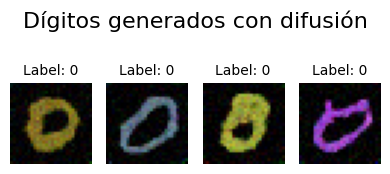

In [18]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_ve_exponential, condition = diffusion_model_ve_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_ve_exponential, title="Dígitos generados con difusión", labels=condition)

---
## VP - Linear

In [19]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-02 14:00:10,715 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [ ]:
# N_EPOCHS = 32
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_vp_linear.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "vp_sde_linear"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [21]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-02 14:00:10,746 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [22]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_euler.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-02 14:00:10,758 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-02 14:00:10,784 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:00:10,786 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:00:10,837 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:00:10,844 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:00:10,863 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


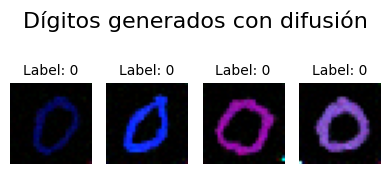

In [23]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_linear_euler, condition = diffusion_model_vp_linear_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_linear_euler, title="Dígitos generados con difusión", labels=condition)

### Predictor corrector

In [24]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='predictor_corrector',
    scheduler_name='linear',
)

2025-05-02 14:00:17,015 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [25]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_predictor.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-02 14:00:17,034 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-02 14:00:17,063 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:00:17,064 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:00:17,123 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:00:17,132 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:00:17,181 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


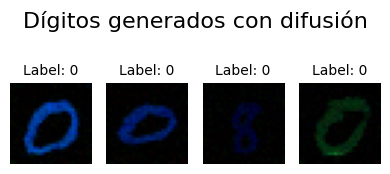

In [26]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_linear_predictor, condition = diffusion_model_vp_linear_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_linear_predictor, title="Dígitos generados con difusión", labels=condition)

### Flow ODE

In [27]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='probability_flow_ode',
    scheduler_name='linear',
)

2025-05-02 14:01:26,036 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [28]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_flow_ode.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-02 14:01:26,053 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-02 14:01:26,073 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:01:26,074 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:01:26,113 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:01:26,119 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:01:26,140 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


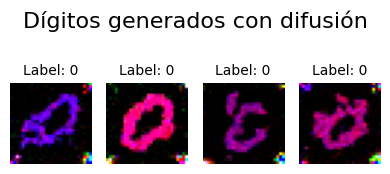

In [29]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_flow_ode, condition = diffusion_model_vp_linear_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_flow_ode, title="Dígitos generados con difusión", labels=condition)

### Exponential Integrator

In [30]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_linear_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='linear',
)

2025-05-02 14:01:37,068 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [31]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_linear_exponential.load_score_model("../checkpoints/vp_sde_linear.pt")

2025-05-02 14:01:37,083 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_linear.pt
2025-05-02 14:01:37,102 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:01:37,103 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:01:37,141 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:01:37,146 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:01:37,168 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


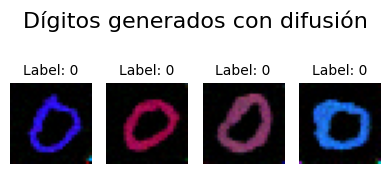

In [32]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_exponential_integrator, condition = diffusion_model_vp_linear_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_exponential_integrator, title="Dígitos generados con difusión", labels=condition)

---
## VP - Cosine

In [33]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-02 14:01:44,286 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [ ]:
# N_EPOCHS = 34
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_vp_cosine.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "vp_sde_cosine"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [35]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-02 14:01:44,328 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [36]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_euler.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-02 14:01:44,347 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-02 14:01:44,390 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:01:44,392 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:01:44,428 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:01:44,433 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:01:44,454 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


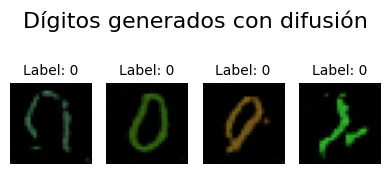

In [37]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_euler, condition = diffusion_model_vp_cosine_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_euler, title="Dígitos generados con difusión", labels=condition)

### Predictor - Corrector

In [38]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='predictor_corrector',
    scheduler_name='cosine',
)

2025-05-02 14:01:51,649 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [39]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_predictor.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-02 14:01:51,668 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-02 14:01:51,701 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:01:51,703 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:01:51,758 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:01:51,764 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:01:51,782 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


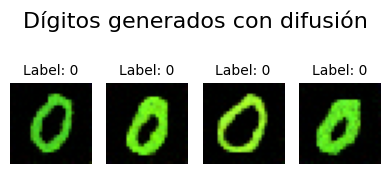

In [40]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_predictor, condition = diffusion_model_vp_cosine_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_predictor, title="Dígitos generados con difusión", labels=condition)

### Flow ODE

In [41]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
)

2025-05-02 14:03:02,020 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [42]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_flow_ode.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-02 14:03:02,033 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-02 14:03:02,056 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:03:02,058 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:03:02,094 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:03:02,099 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:03:02,143 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


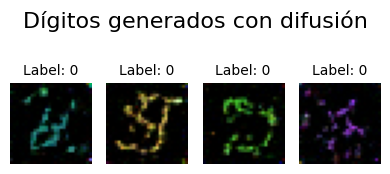

In [43]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_flow_ode, condition = diffusion_model_vp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_flow_ode, title="Dígitos generados con difusión", labels=condition)

### Exponential Integrator

In [44]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_vp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='vp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
)

2025-05-02 14:03:14,074 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [45]:
# Cargar un modelo pre-entrenado
diffusion_model_vp_cosine_exponential.load_score_model("../checkpoints/vp_sde_cosine.pt")

2025-05-02 14:03:14,087 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/vp_sde_cosine.pt
2025-05-02 14:03:14,106 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:03:14,107 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:03:14,141 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:03:14,147 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:03:14,170 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


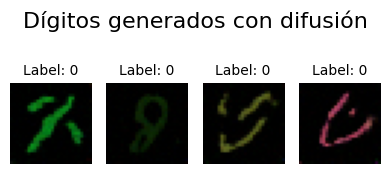

In [46]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_vp_cosine_exponential, condition = diffusion_model_vp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_vp_cosine_exponential, title="Dígitos generados con difusión", labels=condition)

---
## SubVP - Linear

In [47]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-02 14:03:21,777 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [ ]:
# N_EPOCHS = 34
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_subvp_linear.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "subvp_sde_linear"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [49]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='linear',
)

2025-05-02 14:03:21,808 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [50]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_euler.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-02 14:03:21,822 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-02 14:03:21,873 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:03:21,875 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:03:21,919 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:03:21,925 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:03:21,951 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


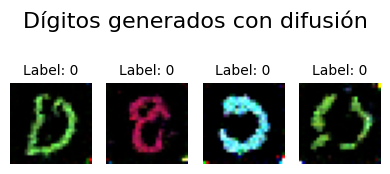

In [51]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_euler, condition = diffusion_model_subvp_linear_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_euler, title="Dígitos generados con difusión", labels=condition)

### Predictor - Corrector

In [52]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='predictor_corrector',
    scheduler_name='linear',
)

2025-05-02 14:03:28,932 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [53]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_predictor.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-02 14:03:28,947 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-02 14:03:28,972 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:03:28,973 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:03:29,019 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:03:29,027 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:03:29,055 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


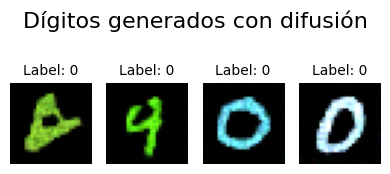

In [54]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_predictor, condition = diffusion_model_subvp_linear_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_predictor, title="Dígitos generados con difusión", labels=condition)

### Flow ODE

In [55]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='probability_flow_ode',
    scheduler_name='linear',
)

2025-05-02 14:04:41,569 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [56]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_flow_ode.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-02 14:04:41,586 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-02 14:04:41,608 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:04:41,609 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:04:41,646 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:04:41,653 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:04:41,673 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


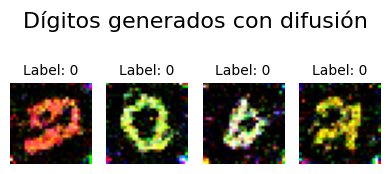

In [57]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_flow_ode, condition = diffusion_model_subvp_linear_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_flow_ode, title="Dígitos generados con difusión", labels=condition)

### Exponential Integrator

In [58]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_linear_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='linear',
)

2025-05-02 14:04:53,156 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [59]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_linear_exponential.load_score_model("../checkpoints/subvp_sde_linear.pt")

2025-05-02 14:04:53,172 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_linear.pt
2025-05-02 14:04:53,197 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:04:53,199 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:04:53,254 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:04:53,262 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:04:53,284 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


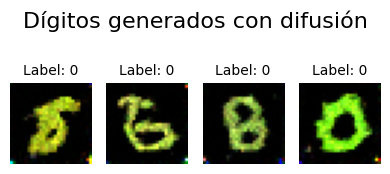

In [60]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_linear_exponential, condition = diffusion_model_subvp_linear_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_linear_exponential, title="Dígitos generados con difusión", labels=condition)

---
## SubVP - Cosine

In [61]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-02 14:05:00,210 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [ ]:
# N_EPOCHS = 38
# print(f"Entrenando el modelo por {N_EPOCHS} epochs...")

# # Función para mostrar el progreso del entrenamiento
# def training_callback(model, epoch, history):
#     print(f"Epoch {epoch+1}, Loss: {history['loss'][-1]:.6f}")

# # Entrenar el modelo
# training_history = diffusion_model_subvp_cosine.train(
#     dataloader=train_dataloader,
#     n_epochs=N_EPOCHS,
#     lr=LR,
#     checkpoint_interval=CHECKPOINT_INTERVAL,
#     callback=training_callback,
#     model_file_name = "subvp_sde_cosine"
# )
# plot_training_history(training_history, title="Pérdida del modelo de difusión")

### Euler Maruyama

In [63]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_euler = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='euler_maruyama',
    scheduler_name='cosine',
)

2025-05-02 14:05:00,260 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [64]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_euler.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-02 14:05:00,291 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-02 14:05:00,342 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:05:00,343 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:05:00,401 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:05:00,407 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:05:00,432 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


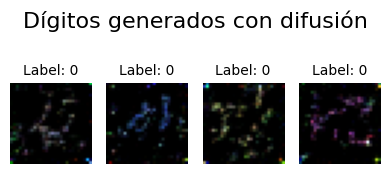

In [65]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_euler, condition = diffusion_model_subvp_cosine_euler.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_euler, title="Dígitos generados con difusión", labels=condition)

### Predictor - corrector

In [66]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_predictor = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='predictor_corrector',
    scheduler_name='cosine',
)

2025-05-02 14:05:08,540 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [67]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_predictor.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-02 14:05:08,554 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-02 14:05:08,580 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:05:08,581 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:05:08,621 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:05:08,629 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:05:08,649 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


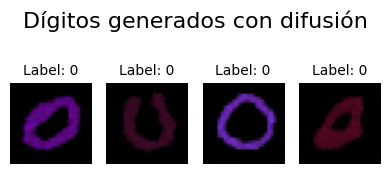

In [68]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_predictor, condition = diffusion_model_subvp_cosine_predictor.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_predictor, title="Dígitos generados con difusión", labels=condition)

### Flow ODE

In [69]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_flow_ode = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='probability_flow_ode',
    scheduler_name='cosine',
)

2025-05-02 14:06:14,211 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [70]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_flow_ode.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-02 14:06:14,227 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-02 14:06:14,246 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:06:14,247 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:06:14,279 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:06:14,285 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:06:14,308 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


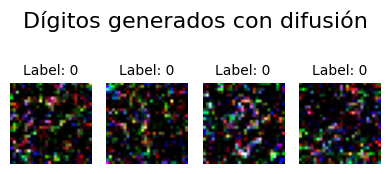

In [71]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_flow_ode, condition = diffusion_model_subvp_cosine_flow_ode.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_flow_ode, title="Dígitos generados con difusión", labels=condition)

### Exponential Integrator

In [72]:
print("Configurando el modelo de difusión...")
# Crear modelo de difusión utilizando el ModelFactory
diffusion_model_subvp_cosine_exponential = ModelFactory.create(
    score_model_class=ScoreNet,
    is_conditional=True,
    sde_name='subvp_sde',
    sampler_name='exponential_integrator',
    scheduler_name='cosine',
)

2025-05-02 14:06:27,053 — DiffusionModel — INFO — Modelo de difusión inicializado en dispositivo: cuda


Configurando el modelo de difusión...


In [73]:
# Cargar un modelo pre-entrenado
diffusion_model_subvp_cosine_exponential.load_score_model("../checkpoints/subvp_sde_cosine.pt")

2025-05-02 14:06:27,068 — DiffusionModel — INFO — Cargando modelo desde ../checkpoints/subvp_sde_cosine.pt
2025-05-02 14:06:27,094 — DiffusionModel — INFO — Forma de datos cargada: torch.Size([3, 28, 28])
2025-05-02 14:06:27,095 — DiffusionModel — INFO — Parámetros del modelo actualizados desde checkpoint
2025-05-02 14:06:27,136 — DiffusionModel — INFO — Modelo de score inicializado correctamente
2025-05-02 14:06:27,144 — DiffusionModel — INFO — Modelo cargado correctamente


2025-05-02 14:06:27,167 — DiffusionModel — INFO — Generando 4 muestras con 1000 pasos


Generando imágenes del dígito 0...


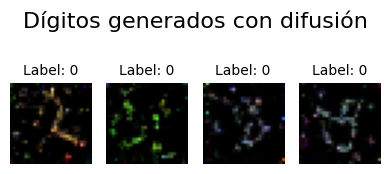

In [74]:
DIGIT_CLASS = 0

# Parámetros para generación
N_SAMPLES = 4
N_STEPS = 1000

# Crear tensor de condición para el dígito especificado
condition = [DIGIT_CLASS]*N_SAMPLES

print(f"Generando imágenes del dígito {DIGIT_CLASS}...")

# Generar imágenes
generated_images_subvp_cosine_exponential, condition = diffusion_model_subvp_cosine_exponential.generate(
    n_samples=N_SAMPLES,
    condition=condition,
    n_steps=N_STEPS 
)
# Mostrar imágenes generadas
show_images(generated_images_subvp_cosine_exponential, title="Dígitos generados con difusión", labels=condition)